Author: Alexis Laignelet

Date: 06/09/19

# Import packages

In [1]:
from FBSNN import * # import the FBSNN 
from run_model import * # import the module to plot and save model

# General parameters

Define here the different parameters to be used to instanciate the model and run it.

In [82]:
# Properties: M the number of trajectories (batch size), N the number of time steps, D the dimension 
M = 10
N = 50
D = 10
T = 1.0

# Architecture
layers = [D+1] + 2*[50] + [1]

# Initial conditions
Xi = np.array([1.0,0.5]*int(D/2))[None,:]

# Training
iteration = [2000] # [1000, 2000]
learning_rate = [1e-5] # [1e-3, 1e-4]

In [78]:
# This dictionnary of parameters is pass as an kwargs to parametrise the model

params = {'optimiser': 'Adam', # SGD, SGLD, CTLD, Adam
          
          # SGLD
          'beta': 1000,
          
          # CTLD
          'Ls': 200, # iterations for exploration phase
          
          # Implicit scheme
          'implicit': False,
          'tau_implicit': 1e-3,
          'iter_implicit': 6,
          'record_implicit': True, # save inner loop for plot purpose
          
          # General paramaters
          'seed': 0, # weight initialisation
          'test_mode': False, # SGD and fixed random seed
          'activation': 'sin', # sin, relu
          }

params_proxy = {'tau_prox': 0.01,

               # General paramaters
               'seed': 0, # weight initialisation
               'activation': 'sin', # sin, relu
               }

# Run the model

In [79]:
model = FBSNN(Xi, T, M, N, D, layers, **params)

In [83]:
output = model.run_model(iteration, learning_rate)

Optimiser:  Adam
It: 0, Loss: 1.664e-01, Y0: 7.691, Time: 0.15, Learning Rate: 1.000e-05
It: 10, Loss: 1.368e-01, Y0: 7.688, Time: 0.91, Learning Rate: 1.000e-05
It: 20, Loss: 2.055e-01, Y0: 7.687, Time: 0.92, Learning Rate: 1.000e-05
It: 30, Loss: 1.621e-01, Y0: 7.685, Time: 0.91, Learning Rate: 1.000e-05
It: 40, Loss: 8.785e-02, Y0: 7.679, Time: 0.92, Learning Rate: 1.000e-05
It: 50, Loss: 1.312e-01, Y0: 7.683, Time: 0.89, Learning Rate: 1.000e-05
It: 60, Loss: 1.340e-01, Y0: 7.682, Time: 0.90, Learning Rate: 1.000e-05
It: 70, Loss: 1.094e-01, Y0: 7.686, Time: 0.89, Learning Rate: 1.000e-05
It: 80, Loss: 9.729e-02, Y0: 7.681, Time: 0.91, Learning Rate: 1.000e-05
It: 90, Loss: 2.368e-01, Y0: 7.681, Time: 1.06, Learning Rate: 1.000e-05
It: 100, Loss: 1.038e-01, Y0: 7.691, Time: 1.79, Learning Rate: 1.000e-05
It: 110, Loss: 1.069e-01, Y0: 7.684, Time: 1.37, Learning Rate: 1.000e-05
It: 120, Loss: 1.240e-01, Y0: 7.687, Time: 2.14, Learning Rate: 1.000e-05
It: 130, Loss: 9.651e-02, Y0: 7.

It: 1110, Loss: 1.204e-01, Y0: 7.688, Time: 0.99, Learning Rate: 1.000e-05
It: 1120, Loss: 1.536e-01, Y0: 7.687, Time: 1.02, Learning Rate: 1.000e-05
It: 1130, Loss: 1.223e-01, Y0: 7.691, Time: 1.26, Learning Rate: 1.000e-05
It: 1140, Loss: 1.105e-01, Y0: 7.690, Time: 0.96, Learning Rate: 1.000e-05
It: 1150, Loss: 8.341e-02, Y0: 7.691, Time: 0.97, Learning Rate: 1.000e-05
It: 1160, Loss: 1.815e-01, Y0: 7.694, Time: 0.97, Learning Rate: 1.000e-05
It: 1170, Loss: 1.159e-01, Y0: 7.691, Time: 0.97, Learning Rate: 1.000e-05
It: 1180, Loss: 5.443e-01, Y0: 7.686, Time: 1.24, Learning Rate: 1.000e-05
It: 1190, Loss: 2.642e-01, Y0: 7.690, Time: 1.03, Learning Rate: 1.000e-05
It: 1200, Loss: 1.922e-01, Y0: 7.687, Time: 0.99, Learning Rate: 1.000e-05
It: 1210, Loss: 1.035e-01, Y0: 7.690, Time: 1.03, Learning Rate: 1.000e-05
It: 1220, Loss: 1.059e-01, Y0: 7.696, Time: 1.04, Learning Rate: 1.000e-05
It: 1230, Loss: 1.650e-01, Y0: 7.693, Time: 0.99, Learning Rate: 1.000e-05
It: 1240, Loss: 2.095e-01

In [11]:
# Save the model
save_pickle(output, 'output')

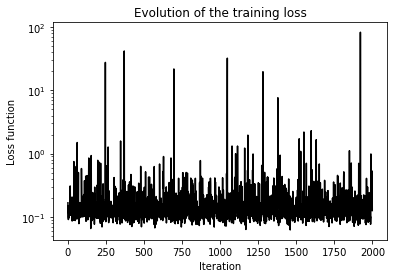

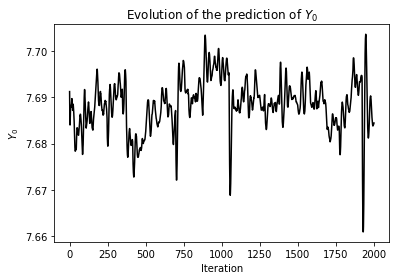

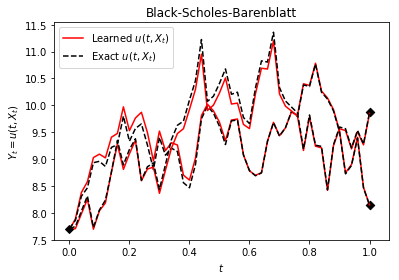

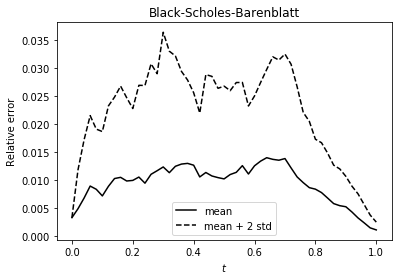

In [84]:
# Plot the results
plot_model(output)

# Proxy model

In [ ]:
model_proxy = FBSNN_proxy(Xi, T, M, N, D, layers, **params_proxy)

In [ ]:
output_proxy = model_proxy.run_model(iteration, learning_rate)

In [ ]:
# Save the model
save_pickle(output_proxy, 'output_proxy')

In [ ]:
# Plot the results
plot_model(output_proxy)